In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())

In [3]:
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

In [4]:
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(len(training_data) * 0.2))
train_sampler = SubsetRandomSampler(indices[:split])
validate_sampler = SubsetRandomSampler(indices[split:])

In [5]:
train_loader = torch.utils.data.DataLoader(training_data, sampler=train_sampler, batch_size=64)
valid_loader = torch.utils.data.DataLoader(training_data, sampler=validate_sampler, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [29]:
%matplotlib inline
dataiter = iter(train_loader)
print(dataiter)
images, labels = dataiter.__next__()

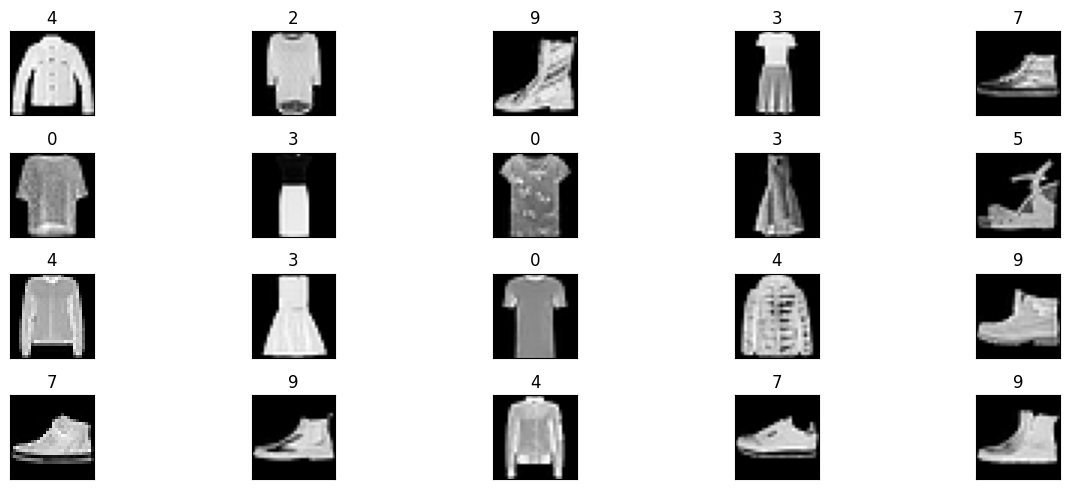

In [33]:
fig = plt.figure(figsize=(15, 5))
for i in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='grey')
    ax.set_title(labels[i].item())
    fig.tight_layout()